In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
from time import time
from scipy.optimize import curve_fit
from google.colab import files
import io
from tabulate import tabulate
from scipy import optimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PRICES SIMULATION

## Black-Scholes for Vanilla Call Option

In [ ]:
def d1(s0,k,r,sigma,T):
    return (np.log(s0/k)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))

def d2(s0,k,r,sigma,T):
     return (np.log(s0/k)+(r-sigma**2/2)*T)/(sigma*np.sqrt(T))
    
def BS(s0,k,r,sigma,T):
    return s0*ss.norm.cdf(d1(s0,k,r,sigma,T))-k*np.exp(-r*T)*ss.norm.cdf(d2(s0,k,r,sigma,T))

## Monte Carlo Simulations





In [ ]:
def std_MC(S0,k,sigma0,n,m,T,alpha,rho):
  W1=np.random.normal(0,1,(n,m+1))
  W2=np.random.normal(0,1,(n,m+1))
  sigma=np.zeros([n,m+1])
  S=np.zeros([n,m+1])
  X=np.zeros([n,m+1])
  Payoff=np.zeros(n)
  for i in range(0,n):
    sigma[i][0]=sigma0
    S[i][0]=S0
    for j in range(0,m):
      sigma[i][j+1]=sigma[i][j]+alpha*sigma[i][j]*W1[i][j]*np.sqrt(T/m)
      X[i][j+1]=X[i][j]-0.5*(sigma[i][j]**2)*T/m+sigma[i][j]*(rho*W1[i][j]+np.sqrt(1-(rho**2))*W2[i][j])*np.sqrt(T/m)
    S[i]=S0*np.exp(X[i])
    Payoff[i]=np.maximum(S[i][m]-k,0)
  Option_price=np.mean(Payoff)
  return Option_price

In [ ]:
def cond_MC(S0,k,sigma0,n,m,T,alpha,rho):
  time=np.zeros([m+1])
  W=np.random.normal(0,1,(n,m+1))
  sigma1=np.zeros([n,m+1])
  BS2=np.zeros(n)
  S0_prime=np.zeros(n)
  sigma_rt=np.zeros(n)
  sigdef=np.zeros(n)
  int_dw=np.zeros(n)
  for i in range (0,n):
    sigma1[i][0]=sigma0
    for j in range (0,m):
      time[j+1]=time[j]+T/m
      sigma1[i][j+1]=sigma1[i][j]*np.exp((-0.5*alpha**2)*time[j+1]+alpha*W[i][j]*np.sqrt(T/m))
    int_du=np.sum(sigma1[i]**2)*T/m
    rt_var=np.sqrt(np.mean(sigma1[i]**2))
    for j in range(0,m):
      int_dw[i]=int_dw[i]+sigma1[i][j]*(W[i][j+1]-W[i][j])*np.sqrt(T/m)
    S0_prime[i]=S0*np.exp(-0.5*rho**2*int_du+rho*int_dw[i])
    sigdef[i]=np.sqrt(1-rho**2)*rt_var
    BS2[i]=BS(S0_prime[i],k,0,sigdef[i],T)
  option_price=np.mean(BS2)
  return option_price

## Standard and Conditional Monte Carlo simulations for Vanilla Call Option

Vector of option price simulations = (100, 500, 50)

Underlying asset price (s0) = 100

Number of paths simulated (n) = 100

Number of periods (m) = 1000

In [ ]:
S_MC_11=np.zeros(100)
S_CMC_11=np.zeros(100)
t_MC_11=np.zeros(100)
t_CMC_11=np.zeros(100)

for i in range(1,100):
  st_MC_11=time()
  S_MC_11[i]=std_MC(100,80,0.15,100,1000,1,0.4,0.6)
  fin_MC_11=time()
  t_MC_11[i]=fin_MC_11-st_MC_11
  st_CMC_11=time()
  S_CMC_11[i]=cond_MC(100,80,0.15,100,1000,1,0.4,0.6)
  fin_CMC_11=time()
  t_CMC_11[i]=fin_CMC_11-st_CMC_11
    
sd_MC_11=np.std(S_MC_11)
mean_MC_11=np.mean(S_MC_11)
meant_MC_11=np.mean(t_MC_11)

sd_CMC_11=np.std(S_CMC_11)
mean_CMC_11=np.mean(S_CMC_11)
meant_CMC_11=np.mean(t_CMC_11)
    
S_MC_12=np.zeros(500)
S_CMC_12=np.zeros(500)
t_MC_12=np.zeros(500)
t_CMC_12=np.zeros(500)

for i in range(1,500):
  st_MC_12=time()
  S_MC_12[i]=std_MC(100,80,0.15,100,1000,1,0.4,0.6)
  fin_MC_12=time()
  t_MC_12[i]=fin_MC_12-st_MC_12
  st_CMC_12=time()
  S_CMC_12[i]=cond_MC(100,80,0.15,100,1000,1,0.4,0.6)
  fin_CMC_12=time()
  t_CMC_12[i]=fin_CMC_12-st_CMC_12

sd_MC_12=np.std(S_MC_12)
mean_MC_12=np.mean(S_MC_12)
meant_MC_12=np.mean(t_MC_12)

sd_CMC_12=np.std(S_CMC_12)
mean_CMC_12=np.mean(S_CMC_12)
meant_CMC_12=np.mean(t_CMC_12)

S_MC_13=np.zeros(50)
S_CMC_13=np.zeros(50)
t_MC_13=np.zeros(50)
t_CMC_13=np.zeros(50)

for i in range(1,50):
  st_MC_13=time()
  S_MC_13[i]=std_MC(100,80,0.15,100,1000,1,0.4,0.6)
  fin_MC_13=time()
  t_MC_13[i]=fin_MC_13-st_MC_13
  st_CMC_13=time()
  S_CMC_13[i]=cond_MC(100,80,0.15,100,1000,1,0.4,0.6)
  fin_CMC_13=time()
  t_CMC_13[i]=fin_CMC_13-st_CMC_13
    
sd_MC_13=np.std(S_MC_13)
mean_MC_13=np.mean(S_MC_13)
meant_MC_13=np.mean(t_MC_13)

sd_CMC_13=np.std(S_CMC_13)
mean_CMC_13=np.mean(S_CMC_13)
meant_CMC_13=np.mean(t_CMC_13)

tvm_11={'MC':[meant_MC_11,sd_MC_11,mean_MC_11],'CMC':[meant_CMC_11,sd_CMC_11,mean_CMC_11]}
tvm_12={'MC':[meant_MC_12,sd_MC_12,mean_MC_12],'CMC':[meant_CMC_12,sd_CMC_12,mean_CMC_12]}
tvm_13={'MC':[meant_MC_13,sd_MC_13,mean_MC_13],'CMC':[meant_CMC_13,sd_CMC_13,mean_CMC_13]}

df_11=pd.DataFrame(tvm_11,index=['Seconds','SD','Mean'])
print(df_11)
df_12=pd.DataFrame(tvm_12,index=['Seconds','SD','Mean'])
print(df_12)
df_13=pd.DataFrame(tvm_13,index=['Seconds','SD','Mean'])
print(df_13)


Vector of option price simulations = (100, 500, 50)

Underlying asset price (s0) = 100

Number of paths simulated (n) = 500

Number of periods (m) = 1000

In [ ]:
S_MC_21=np.zeros(100)
S_CMC_21=np.zeros(100)
t_MC_21=np.zeros(100)
t_CMC_21=np.zeros(100)

for i in range(1,100):
  st_MC_21=time()
  S_MC_21[i]=std_MC(100,80,0.15,500,1000,1,0.4,0.6)
  fin_MC_21=time()
  t_MC_21[i]=fin_MC_21-st_MC_21
  st_CMC_21=time()
  S_CMC_21[i]=cond_MC(100,80,0.15,500,1000,1,0.4,0.6)
  fin_CMC_21=time()
  t_CMC_21[i]=fin_CMC_21-st_CMC_21
    
sd_MC_21=np.std(S_MC_21)
mean_MC_21=np.mean(S_MC_21)
meant_MC_21=np.mean(t_MC_21)

sd_CMC_21=np.std(S_CMC_21)
mean_CMC_21=np.mean(S_CMC_21)
meant_CMC_21=np.mean(t_CMC_21)
    
S_MC_22=np.zeros(500)
S_CMC_22=np.zeros(500)
t_MC_22=np.zeros(500)
t_CMC_22=np.zeros(500)

for i in range(1,500):
  st_MC_22=time()
  S_MC_22[i]=std_MC(100,80,0.15,500,1000,1,0.4,0.6)
  fin_MC_22=time()
  t_MC_22[i]=fin_MC_22-st_MC_22
  st_CMC_22=time()
  S_CMC_22[i]=cond_MC(100,80,0.15,500,1000,1,0.4,0.6)
  fin_CMC_22=time()
  t_CMC_22[i]=fin_CMC_22-st_CMC_22

sd_MC_22=np.std(S_MC_22)
mean_MC_22=np.mean(S_MC_22)
meant_MC_22=np.mean(t_MC_22)

sd_CMC_22=np.std(S_CMC_22)
mean_CMC_22=np.mean(S_CMC_22)
meant_CMC_22=np.mean(t_CMC_22)

S_MC_23=np.zeros(50)
S_CMC_23=np.zeros(50)
t_MC_23=np.zeros(50)
t_CMC_23=np.zeros(50)

for i in range(1,50):
  st_MC_23=time()
  S_MC_23[i]=std_MC(100,80,0.15,500,1000,1,0.4,0.6)
  fin_MC_23=time()
  t_MC_23[i]=fin_MC_23-st_MC_23
  st_CMC_23=time()
  S_CMC_23[i]=cond_MC(100,80,0.15,500,1000,1,0.4,0.6)
  fin_CMC_23=time()
  t_CMC_23[i]=fin_CMC_23-st_CMC_23
    
sd_MC_23=np.std(S_MC_23)
mean_MC_23=np.mean(S_MC_23)
meant_MC_23=np.mean(t_MC_23)

sd_CMC_23=np.std(S_CMC_23)
mean_CMC_23=np.mean(S_CMC_23)
meant_CMC_23=np.mean(t_CMC_23)

tvm_21={'MC':[meant_MC_21,sd_MC_21,mean_MC_21],'CMC':[meant_CMC_21,sd_CMC_21,mean_CMC_21]}
tvm_22={'MC':[meant_MC_22,sd_MC_22,mean_MC_22],'CMC':[meant_CMC_22,sd_CMC_22,mean_CMC_22]}
tvm_23={'MC':[meant_MC_23,sd_MC_23,mean_MC_23],'CMC':[meant_CMC_23,sd_CMC_23,mean_CMC_23]}

df_21=pd.DataFrame(tvm_21,index=['Seconds','SD','Mean'])
print(df_21)
df_22=pd.DataFrame(tvm_22,index=['Seconds','SD','Mean'])
print(df_22)
df_23=pd.DataFrame(tvm_23,index=['Seconds','SD','Mean'])
print(df_23)

Vector of option price simulations = (100, 500, 50)

Underlying asset price (s0) = 100

Number of paths simulated (n) = 1000

Number of periods (m) = 1000

In [ ]:
S_MC_31=np.zeros(100)
S_CMC_31=np.zeros(100)
t_MC_31=np.zeros(100)
t_CMC_31=np.zeros(100)

for i in range(1,100):
  st_MC_31=time()
  S_MC_31[i]=std_MC(100,80,0.15,500,1000,1,0.4,0.6)
  fin_MC_31=time()
  t_MC_31[i]=fin_MC_31-st_MC_31
  st_CMC_31=time()
  S_CMC_31[i]=std_MC(100,80,0.15,500,1000,1,0.4,0.6)
  fin_CMC_31=time()
  t_CMC_31[i]=fin_CMC_31-st_CMC_31
    
sd_MC_31=np.std(S_MC_31)
mean_MC_31=np.mean(S_MC_31)
meant_MC_31=np.mean(t_MC_31)

sd_CMC_31=np.std(S_CMC_31)
mean_CMC_31=np.mean(S_CMC_31)
meant_CMC_31=np.mean(t_CMC_31)
    
S_MC_32=np.zeros(300)
S_CMC_32=np.zeros(300)
t_MC_32=np.zeros(300)
t_CMC_32=np.zeros(300)

for i in range(1,300):
  st_MC_32=time()
  S_MC_32[i]=std_MC(100,80,0.15,500,1000,1,0.4,0.6)
  fin_MC_32=time()
  t_MC_32[i]=fin_MC_32-st_MC_32
  st_CMC_32=time()
  S_CMC_32[i]=cond_MC(100,80,0.15,500,1000,1,0.4,0.6)
  fin_CMC_32=time()
  t_CMC_32[i]=fin_CMC_32-st_CMC_32

sd_MC_32=np.std(S_MC_32)
mean_MC_32=np.mean(S_MC_32)
meant_MC_32=np.mean(t_MC_32)

sd_CMC_32=np.std(S_CMC_32)
mean_CMC_32=np.mean(S_CMC_32)
meant_CMC_32=np.mean(t_CMC_32)

S_MC_33=np.zeros(50)
S_CMC_33=np.zeros(50)
t_MC_33=np.zeros(50)
t_CMC_33=np.zeros(50)

for i in range(1,50):
  st_MC_33=time()
  S_MC_33[i]=std_MC(100,80,0.15,500,1000,1,0.4,0.6)
  fin_MC_33=time()
  t_MC_33[i]=fin_MC_33-st_MC_33
  st_CMC_33=time()
  S_CMC_33[i]=cond_MC(100,80,0.15,500,1000,1,0.4,0.6)
  fin_CMC_33=time()
  t_CMC_33[i]=fin_CMC_33-st_CMC_33
    
sd_MC_33=np.std(S_MC_33)
mean_MC_33=np.mean(S_MC_33)
meant_MC_33=np.mean(t_MC_33)

sd_CMC_33=np.std(S_CMC_33)
mean_CMC_33=np.mean(S_CMC_33)
meant_CMC_33=np.mean(t_CMC_33)

tvm_31={'MC':[meant_MC_31,sd_MC_31,mean_MC_31],'CMC':[meant_CMC_31,sd_CMC_31,mean_CMC_31]}
tvm_32={'MC':[meant_MC_32,sd_MC_32,mean_MC_32],'CMC':[meant_CMC_32,sd_CMC_32,mean_CMC_32]}
tvm_33={'MC':[meant_MC_33,sd_MC_33,mean_MC_33],'CMC':[meant_CMC_33,sd_CMC_33,mean_CMC_33]}

df_31=pd.DataFrame(tvm_31,index=['Seconds','SD','Mean'])
print(df_31)
df_32=pd.DataFrame(tvm_32,index=['Seconds','SD','Mean'])
print(df_32)
df_33=pd.DataFrame(tvm_33,index=['Seconds','SD','Mean'])
print(df_33)

In [ ]:
for i in range(1,50):
  st_MC_33=time()
  S_MC_33[i]=std_MC(100,80,0.15,500,1000,1,0.4,0.6)
  fin_MC_33=time()
  t_MC_33[i]=fin_MC_33-st_MC_33
  st_CMC_33=time()
  S_CMC_33[i]=cond_MC(100,80,0.15,500,1000,1,0.4,0.6)
  fin_CMC_33=time()
  t_CMC_33[i]=fin_CMC_33-st_CMC_33
    
sd_MC_33=np.std(S_MC_33)
mean_MC_33=np.mean(S_MC_33)
meant_MC_33=np.mean(t_MC_33)

sd_CMC_33=np.std(S_CMC_33)
mean_CMC_33=np.mean(S_CMC_33)
meant_CMC_33=np.mean(t_CMC_33)

tvm_33={'MC':[meant_MC_33,sd_MC_33,mean_MC_33],'CMC':[meant_CMC_33,sd_CMC_33,mean_CMC_33]}

df_33=pd.DataFrame(tvm_33,index=['Seconds','SD','Mean'])
print(df_33)

# SABR CALIBRATION

## FIiles

In [ ]:
uploaded = files.upload()


Saving DATA_ES500.xlsx to DATA_ES500.xlsx
Saving Forward_prices.xlsx to Forward_prices.xlsx
Saving IV.xlsx to IV.xlsx


In [ ]:
d = pd.read_excel(io.BytesIO(uploaded['DATA_ES500.xlsx'])) #implied volatility surface with strikes
fwd = pd.read_excel(io.BytesIO(uploaded['Forward_prices.xlsx'])) #forward prices
IV = pd.read_excel(io.BytesIO(uploaded['IV.xlsx'])) #implied vols

In [ ]:
K = d['Strikes'].to_numpy()


forwards = fwd['Forwards'].to_numpy()


start_date= '04/11/2019' #T0
start_date = pd.to_datetime(start_date) 

T = [] 

for i in range(18):
  end = pd.to_datetime(IV.columns.values[i])
  maturity = (end - start_date) 
  T.append(float(maturity.days)/365) # Time to maturity



## Calibrated parameters

In [ ]:
def SABR_calibration(K,alpha,rho,sigma0):
  z = (alpha*np.log(F/K))/sigma0
  x = np.log((np.sqrt(1-2*rho*z+z**2)+z-rho)/(1-rho))
  sigma = sigma0*(z/x)*(1+0.125*tau*(2*alpha*rho*sigma0+alpha**2*((2/3)-rho**2)))
  return sigma

In [ ]:
parameters = np.zeros((3,len(T)))

for i in range(0,len(T)):
  F = forwards[i]
  tau = T[i]
  x0 = np.array([0.7,-0.5,0.15])
  popt,pcov = curve_fit(SABR_calibration, K, IV.iloc[:,i],x0)
  parameters[:,i] = np.transpose(popt)

In [ ]:
alpha=parameters[0,:]
rho= parameters[1,:]
sigma0 = parameters[2,:]

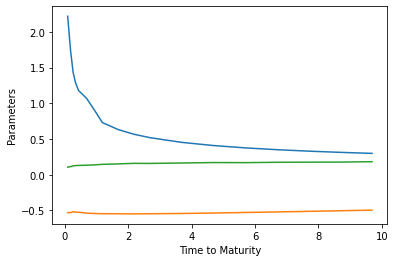

In [ ]:
plt.plot(T,alpha, label='alpha')
plt.plot(T,rho, label='rho')
plt.plot(T,sigma0,label='sigma0')
plt.ylabel('Parameters')
plt.xlabel('Time to Maturity')
plt.show()

Text(0.5, 0, 'Time to Maturity')

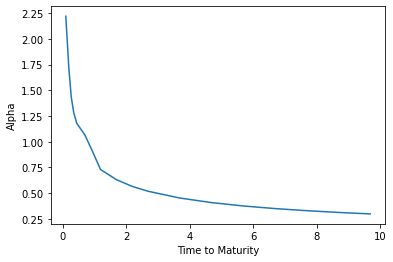

In [ ]:
plt.plot(T,alpha)
plt.ylabel('Alpha')
plt.xlabel('Time to Maturity')

Text(0.5, 0, 'Time to Maturity')

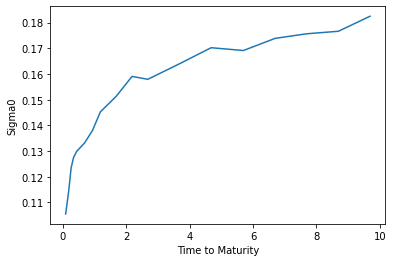

In [ ]:
plt.plot(T,sigma0)
plt.ylabel('Sigma0')
plt.xlabel('Time to Maturity')

Text(0.5, 0, 'Time to Maturity')

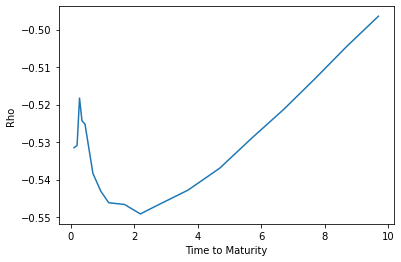

In [ ]:
plt.plot(T,rho)
plt.ylabel('Rho ')
plt.xlabel('Time to Maturity')

Text(0.5, 0, 'Time to Maturity')

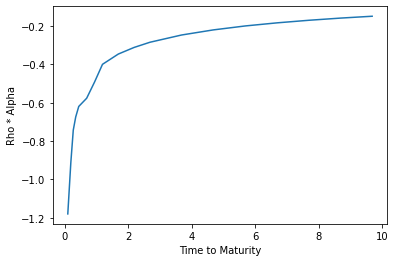

In [ ]:
rv = rho*alpha
plt.plot(T,rv)
plt.ylabel('Rho * Alpha')
plt.xlabel('Time to Maturity')

In [ ]:
Calibration_par = {'Maturity':T,'Alpha':alpha,'Sigma0':sigma0,'Rho':rho,'Skew':rv}
print(tabulate(Calibration_par,headers='keys',tablefmt='fancy_grid',stralign='center'))

╒════════════╤══════════╤══════════╤═══════════╤═══════════╕
│   Maturity │    Alpha │   Sigma0 │       Rho │      Skew │
╞════════════╪══════════╪══════════╪═══════════╪═══════════╡
│  0.0986301 │ 2.21944  │ 0.105532 │ -0.531501 │ -1.17963  │
├────────────┼──────────┼──────────┼───────────┼───────────┤
│  0.194521  │ 1.71631  │ 0.114461 │ -0.530875 │ -0.911148 │
├────────────┼──────────┼──────────┼───────────┼───────────┤
│  0.271233  │ 1.43265  │ 0.123497 │ -0.518251 │ -0.742472 │
├────────────┼──────────┼──────────┼───────────┼───────────┤
│  0.347945  │ 1.28519  │ 0.127518 │ -0.524285 │ -0.673803 │
├────────────┼──────────┼──────────┼───────────┼───────────┤
│  0.443836  │ 1.17833  │ 0.129871 │ -0.525228 │ -0.618893 │
├────────────┼──────────┼──────────┼───────────┼───────────┤
│  0.693151  │ 1.07016  │ 0.133144 │ -0.538324 │ -0.576093 │
├────────────┼──────────┼──────────┼───────────┼───────────┤
│  0.942466  │ 0.904525 │ 0.13799  │ -0.543094 │ -0.491242 │
├────────────┼──────────

[-0.43888698 -0.43104569]


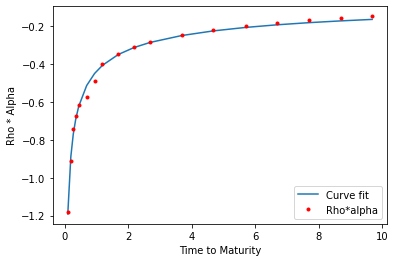

In [ ]:
def skew(T,a,b):
  return(a*T**b)

popt,pcov = curve_fit(skew, T, rv)
print(popt)

plt.plot(T,skew(T,*popt), label='Curve fit')
plt.plot(T,rv,'.',color='red', label = 'Rho*alpha')
plt.ylabel('Rho * Alpha')
plt.xlabel('Time to Maturity')
plt.legend(loc = 'best')

## Implied volatility surface

In [ ]:
IV_cal = [] #calibrated implied volatility surface

for i in range(18):
  tau = T[i]
  F = forwards[i]
  IV_cal.append(SABR_calibration(K,alpha[i],rho[i],sigma0[i]))

IV_cal = pd.DataFrame(IV_cal)


Text(0.5, 0, 'Strikes')

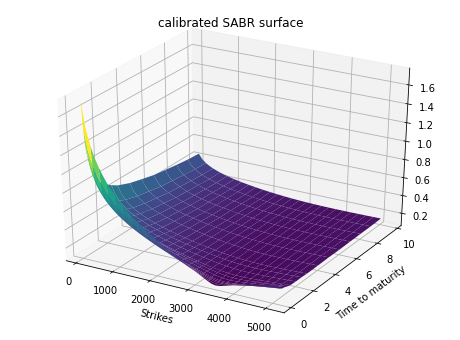

In [ ]:
x = K
y = T
X,Y = np.meshgrid(x,y)
Z = IV_cal
fig = plt.figure()
fig.set_size_inches(8, 6)

ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z, cmap='viridis')

ax.set_title('calibrated SABR surface')
ax.set_ylabel('Time to maturity')
ax.set_xlabel('Strikes')



Text(0.5, 0, 'Strikes')

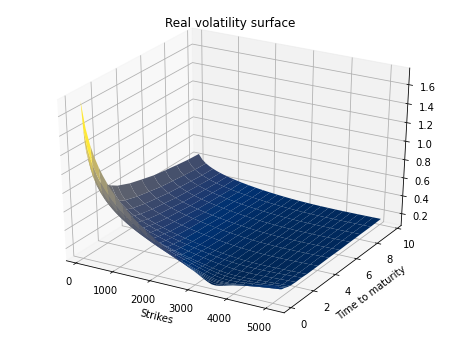

In [ ]:
x = T
y = K
X,Y = np.meshgrid(x,y)
Z = IV #implied vol, real market data
fig = plt.figure()
fig.set_size_inches(8, 6)

ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(Y,X,Z, cmap='cividis')
ax.set_title('Real volatility surface')
ax.set_ylabel('Time to maturity')
ax.set_xlabel('Strikes')

## Volatility skews

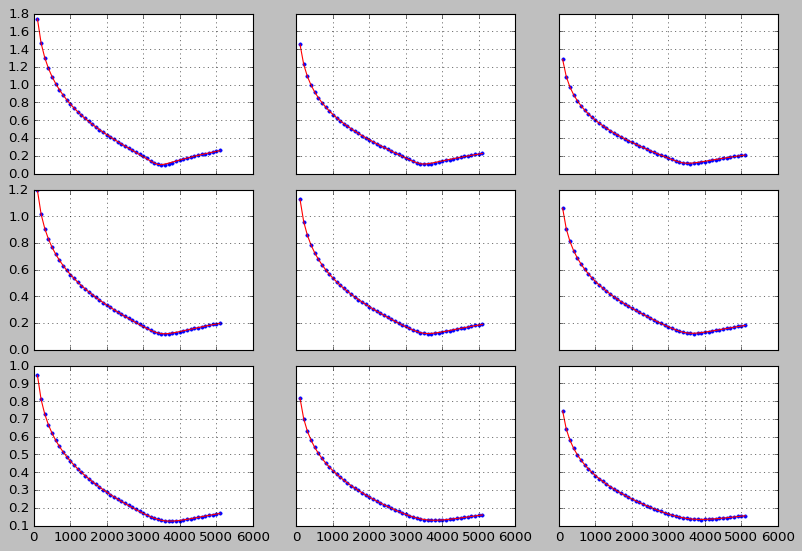

In [ ]:
plt.style.use('classic')
fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(12,8),gridspec_kw={'wspace':0.2,'hspace':0.1},sharex='col',sharey='row')

tau = T[0]
F = forwards[0]
ax[0,0].plot(K,SABR_calibration(K,alpha[0],rho[0],sigma0[0]),'.')
ax[0,0].plot(K,d['5/17/2019'],color='red')
ax[0,0].grid()

tau = T[1]
F = forwards[1]
ax[0,1].plot(K,SABR_calibration(K,alpha[1],rho[1],sigma0[1]),'.')
ax[0,1].plot(K,d['6/21/2019'],color='red')
ax[0,1].grid()

tau = T[2]
F = forwards[2]
ax[0,2].plot(K,SABR_calibration(K,alpha[2],rho[2],sigma0[2]),'.')
ax[0,2].plot(K,d['7/19/2019'],color='red')
ax[0,2].grid()

tau = T[3]
F = forwards[3]
ax[1,0].plot(K,SABR_calibration(K,alpha[3],rho[3],sigma0[3]),'.')
ax[1,0].plot(K,d['8/16/2019'],color='red')
ax[1,0].grid()

tau = T[4]
F = forwards[4]
ax[1,1].plot(K,SABR_calibration(K,alpha[4],rho[4],sigma0[4]),'.',label='Maturity = T[0]')
ax[1,1].plot(K,d['9/20/2019'],color='red')
ax[1,1].grid()

tau = T[5]
F = forwards[5]
ax[1,2].plot(K,SABR_calibration(K,alpha[5],rho[5],sigma0[5]),'.')
ax[1,2].plot(K,d['12/20/2019'],color='red')
ax[1,2].grid()

tau = T[6]
F = forwards[6]
ax[2,0].plot(K,SABR_calibration(K,alpha[6],rho[6],sigma0[6]),'.')
ax[2,0].plot(K,d['3/20/2020'],color='red')
ax[2,0].grid()

tau = T[7]
F = forwards[7]
ax[2,1].plot(K,SABR_calibration(K,alpha[7],rho[7],sigma0[7]),'.')
ax[2,1].plot(K,d['6/19/2020'],color='red')
ax[2,1].grid()

tau = T[8]
F = forwards[8]
ax[2,2].plot(K,SABR_calibration(K,alpha[8],rho[8],sigma0[8]),'.')
ax[2,2].plot(K,d['12/18/2020'],color='red')
ax[2,2].grid()





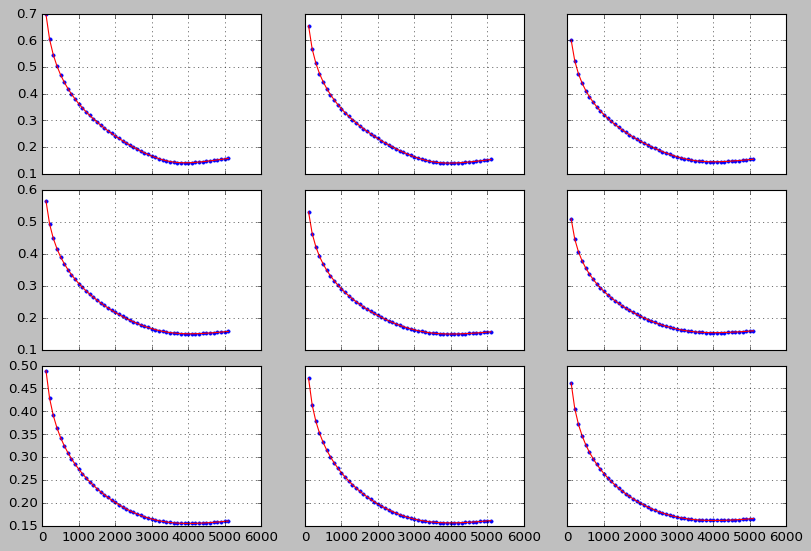

In [ ]:
fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(12,8),gridspec_kw={'wspace':0.2,'hspace':0.1},sharex='col',sharey='row')

tau = T[9]
F = forwards[9]
ax[0,0].plot(K,SABR_calibration(K,alpha[9],rho[9],sigma0[9]),'.')
ax[0,0].plot(K,d['6/18/2021'],color='red')
ax[0,0].grid()

tau = T[10]
F = forwards[10]
ax[0,1].plot(K,SABR_calibration(K,alpha[10],rho[10],sigma0[10]),'.')
ax[0,1].plot(K,d['12/17/2021'],color='red')
ax[0,1].grid()

tau = T[11]
F = forwards[11]
ax[0,2].plot(K,SABR_calibration(K,alpha[11],rho[11],sigma0[11]),'.')
ax[0,2].plot(K,d['12/16/2022'],color='red')
ax[0,2].grid()

tau = T[12]
F = forwards[12]
ax[1,0].plot(K,SABR_calibration(K,alpha[12],rho[12],sigma0[12]),'.')
ax[1,0].plot(K,d['12/15/2023'],color='red')
ax[1,0].grid()

tau = T[13]
F = forwards[13]
ax[1,1].plot(K,SABR_calibration(K,alpha[13],rho[13],sigma0[13]),'.')
ax[1,1].plot(K,d['12/20/2024'],color='red')
ax[1,1].grid()

tau = T[14]
F = forwards[14]
ax[1,2].plot(K,SABR_calibration(K,alpha[14],rho[14],sigma0[14]),'.')
ax[1,2].plot(K,d['12/19/2025'],color='red')
ax[1,2].grid()

tau = T[15]
F = forwards[15]
ax[2,0].plot(K,SABR_calibrationK,alpha[15],rho[15],sigma0[15]),'.')
ax[2,0].plot(K,d['12/18/2026'],color='red')
ax[2,0].grid()

tau = T[16]
F = forwards[16]
ax[2,1].plot(K,SABR_calibration(K,alpha[16],rho[16],sigma0[16]),'.')
ax[2,1].plot(K,d['12/17/2027'],color='red')
ax[2,1].grid()

tau = T[17]
F = forwards[17]
ax[2,2].plot(K,SABR_calibration(K,alpha[17],rho[17],sigma0[17]),'.')
ax[2,2].plot(K,d['12/15/2028'],color='red')
ax[2,2].grid()



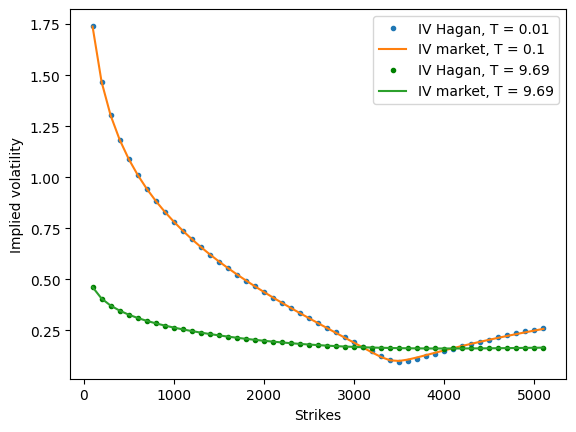

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)

tau = T[0]
F = forwards[0]
plt.plot(K,SABR_calibration(K,alpha[0],rho[0],sigma0[0]),'.',label='IV Hagan, T = 0.01')
plt.plot(K,d['5/17/2019'],label='IV market, T = 0.1')

tau = T[17]
F = forwards[17]
plt.plot(K,SABR_calibration(K,alpha[17],rho[17],sigma0[17]),'.',label='IV Hagan, T = 9.69', color = 'green')
plt.plot(K,d['12/15/2028'],label='IV market, T = 9.69')

plt.xlabel('Strikes')
plt.ylabel('Implied volatility')
plt.legend()


# NUMERICAL METHODS

In [ ]:
Prices = np.zeros((51,18))

for i in range(18):
  tau = T[i]
  F = forwards[i]
  for j in range(51):
    Prices[j][i] = cond_MC(F,K[j],sigma0[i],5000,1000,tau,alpha[i],rho[i])

Prices = pd.DataFrame(Prices)

In [ ]:
Prices

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3.274771e+03,3.131235e+03,3.412681e+03,2.822316e+03,3.248475e+03,3.374158e+03,3.096046e+03,3.698788e+03,3570.046116,2150.358976,3.292969e+03,3268.920681,1599.849336,1902.267877,2.126632e+03,2734.625072,2075.166153,3006.794763
1,3.144635e+03,2.940384e+03,3.044041e+03,2.933209e+03,3.118379e+03,3.240478e+03,2.595100e+03,3.259248e+03,2866.434908,2389.462025,2.826909e+03,2764.817063,2040.026873,1886.796797,4.382837e+03,2010.676155,3533.604758,3604.947066
2,2.994981e+03,2.916917e+03,2.984368e+03,2.679190e+03,2.893702e+03,3.338832e+03,3.089905e+03,2.792605e+03,2444.412925,2733.419919,3.820782e+03,2719.676112,2221.396476,2845.792681,2.645707e+03,2655.536705,1174.114126,1188.678772
3,2.928391e+03,2.950366e+03,2.899181e+03,3.142224e+03,3.153180e+03,2.814777e+03,3.170184e+03,2.795598e+03,2084.341548,2730.426891,2.871074e+03,2842.354524,2689.796085,2610.865266,1.738152e+03,3414.302636,4751.034416,1508.503806
4,2.753032e+03,2.932130e+03,2.625116e+03,3.021251e+03,2.603236e+03,2.848016e+03,2.970231e+03,2.742217e+03,2694.924377,2646.061024,2.093313e+03,2568.196482,1217.400379,1579.327059,3.276866e+03,2668.733609,3609.130760,2121.224317
5,2.716287e+03,2.829056e+03,2.753815e+03,2.655274e+03,2.658117e+03,3.013441e+03,2.585820e+03,3.351348e+03,3346.335971,3255.346329,2.284146e+03,2883.197201,1614.742134,1773.603115,1.775525e+03,2055.949227,1437.349193,1545.452152
6,2.550422e+03,2.514459e+03,2.463940e+03,2.785041e+03,2.386115e+03,2.563444e+03,1.994021e+03,2.413539e+03,2162.670158,2008.519480,2.725754e+03,1921.874598,1724.905295,1459.360684,1.528585e+03,1424.157945,1690.913789,2725.195551
7,2.600576e+03,2.391370e+03,2.688979e+03,2.257216e+03,2.471399e+03,2.474332e+03,2.553859e+03,2.029388e+03,1988.251883,2910.357936,2.083729e+03,2185.716866,2524.063958,1201.534891,2.168762e+03,1251.281050,1760.539995,1260.932752
8,2.428917e+03,2.412981e+03,2.156347e+03,2.505929e+03,2.234518e+03,2.972006e+03,2.808115e+03,2.259001e+03,2724.116649,2942.911794,1.928944e+03,2284.563687,2492.674586,1278.167880,3.666364e+03,1676.680221,1704.273793,1996.337276
9,2.250988e+03,2.410806e+03,2.440827e+03,2.419326e+03,2.191757e+03,2.620932e+03,2.142451e+03,2.332672e+03,2002.595582,2347.832509,2.613867e+03,1336.282263,1639.205626,1697.313809,1.044925e+03,1156.330113,638.477760,1185.732607


In [ ]:
def ImpliedBrent(F0,T,K,optionprice):
    def error(a):
      return(BS(F0, K, 0, a, T)-optionprice)**2 #Assuming MC prices are the real ones
    return optimize.brent(error, brack=(0.001,5))

In [ ]:
IV_BRENT = np.zeros((51,18))

for i in range(18):
  tau = T[i]
  F = forwards[i]

  for j in range(51):
    IV_BRENT[j][i] = ImpliedBrent(F, tau, K[j], Prices[i][j])

In [ ]:
IV_BRENT = pd.DataFrame(IV_BRENT)
IV_BRENT

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.001000,0.001000,106.912033,0.478331,2.543405,47.352207,0.001000,47.352207,26.176103,0.211303,26.176103,26.176103,0.001000,0.001000,0.001000,26.176103,0.001000,26.176103
1,0.001000,0.001000,0.001000,0.001000,0.478211,3.435539,0.001000,47.352207,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,26.176103,0.001000,26.176103,26.176103
2,0.948703,0.001000,0.001000,0.001000,0.001000,47.352207,1.966889,0.222066,0.001000,0.001000,26.176103,0.750011,0.001000,26.176103,1.198334,1.690809,0.001000,0.001000
3,0.001000,1.907816,0.001000,4.198429,3.828974,0.001000,2.927279,0.001000,0.001000,0.745341,1.388885,1.455495,1.093544,1.001754,0.001000,26.176103,26.176103,0.001000
4,0.001000,3.469369,0.001000,3.421041,0.001000,1.241166,1.930348,0.845665,0.108120,0.770571,0.116720,0.746982,0.059824,0.061053,26.176103,2.209628,26.176103,0.416537
5,0.001000,3.077859,1.590579,0.001000,0.001000,2.674135,0.001000,47.352207,26.176103,26.176103,0.001000,1.773052,0.063425,0.001000,0.001000,0.001000,0.001000,0.001000
6,0.001000,0.238607,0.001000,2.507576,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,1.295789,0.001000,0.057558,0.001000,0.001000,0.001000,0.046270,26.176103
7,2.615032,0.001000,2.599329,0.001000,0.001000,0.001000,0.929818,0.001000,0.001000,1.993594,0.100152,0.001000,1.019194,0.001000,0.594342,0.001000,0.001000,0.001000
8,0.001000,0.001000,0.001000,1.642237,0.001000,2.904507,1.996362,0.001000,1.535180,2.163961,0.001000,0.694094,1.015954,0.001000,26.176103,0.001000,0.001000,0.534630
9,0.001000,2.026727,1.931013,1.599654,0.001000,1.833023,0.001000,0.919252,0.001000,0.909955,1.271302,0.001000,0.001000,0.001000,0.001000,0.001000,-0.041211,0.001000


In [ ]:
IV_BRENT = pd.DataFrame.transpose(IV_BRENT)
IV_market = pd.DataFrame.transpose(IV)


In [ ]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'Strikes')

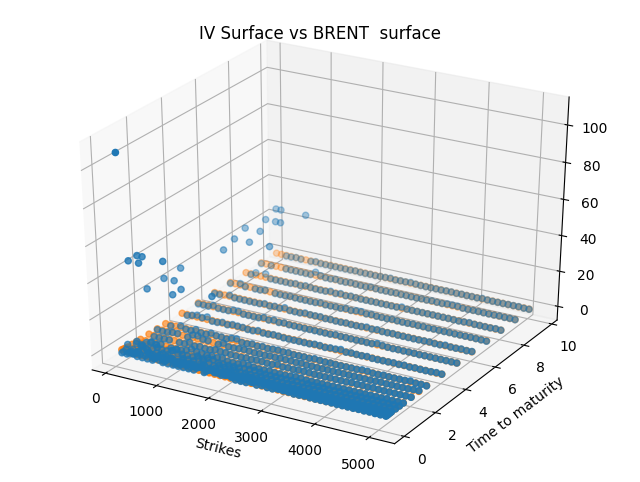

In [ ]:
x = K
y = T
X,Y = np.meshgrid(x,y)
Z = IV_BRENT
fig = plt.figure()
fig.set_size_inches(8, 6)

ax = fig.add_subplot(111,projection='3d')
ax.scatter(X,Y,Z)
ax.scatter(X,Y,IV_cal)

ax.set_title('IV Surface vs BRENT  surface')
ax.set_ylabel('Time to maturity')
ax.set_xlabel('Strikes')

Text(0.5, 0, 'Strikes')

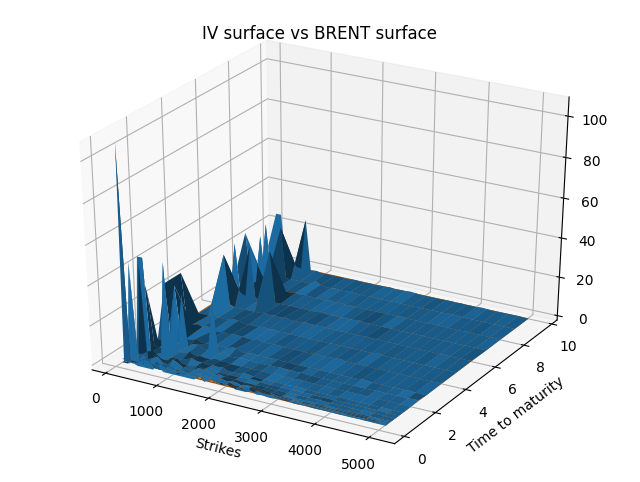

In [ ]:
#IV_market = pd.DataFrame.transpose(IV)
x = K
y = T
X,Y = np.meshgrid(x,y)
Z = IV_BRENT
fig = plt.figure()
fig.set_size_inches(8, 6)

ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)
ax.plot_surface(X,Y,IV_market)

ax.set_title('IV surface vs BRENT surface')
ax.set_ylabel('Time to maturity')
ax.set_xlabel('Strikes')

Text(0.5, 0, 'Strikes')

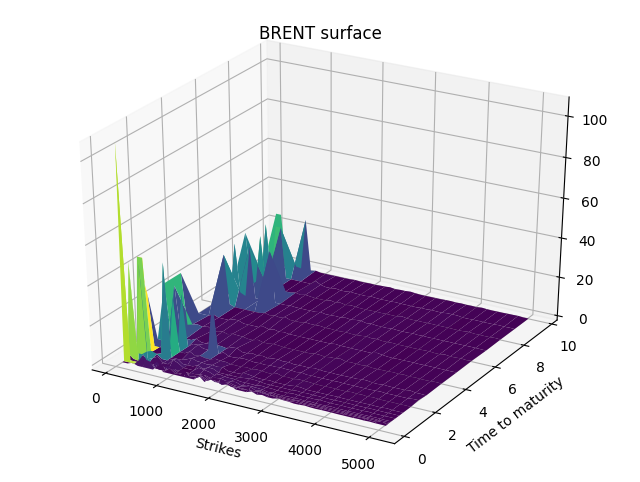

In [ ]:
x = K
y = T
X,Y = np.meshgrid(x,y)
Z = IV_BRENT
fig = plt.figure()
fig.set_size_inches(8, 6)

ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z, cmap='viridis')

ax.set_title('BRENT surface')
ax.set_ylabel('Time to maturity')
ax.set_xlabel('Strikes')

In [ ]:
IV_BRENT

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.001000,0.001000,0.948703,0.001000,0.001000,0.001000,0.001000,2.615032,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.102679,0.001000,0.118204,0.001000,0.001000,0.001000
1,0.001000,0.001000,0.001000,1.907816,3.469369,3.077859,0.238607,0.001000,0.001000,2.026727,...,0.070251,0.085719,0.075539,0.106960,0.215758,0.327596,0.001000,0.001000,0.872433,0.001000
2,106.912033,0.001000,0.001000,0.001000,0.001000,1.590579,0.001000,2.599329,0.001000,1.931013,...,0.068728,0.085207,0.071122,0.202896,0.075490,0.099406,0.134616,0.085067,0.001000,0.131261
3,0.478331,0.001000,0.001000,4.198429,3.421041,0.001000,2.507576,0.001000,1.642237,1.599654,...,0.052234,0.134224,0.096547,0.151210,0.101057,0.091707,0.103133,0.001000,0.138994,0.123926
4,2.543405,0.478211,0.001000,3.828974,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.144399,0.060912,0.146205,0.051956,0.082887,0.122054,0.199856,0.146743,0.093424,0.148436
5,47.352207,3.435539,47.352207,0.001000,1.241166,2.674135,0.001000,0.001000,2.904507,1.833023,...,0.068399,0.065601,0.120992,0.069504,0.264048,0.075281,0.094384,0.070125,0.152857,0.091836
6,0.001000,0.001000,1.966889,2.927279,1.930348,0.001000,0.001000,0.929818,1.996362,0.001000,...,0.122105,0.023837,0.088946,0.083022,0.165357,0.099868,0.090444,0.082913,0.107796,0.071819
7,47.352207,47.352207,0.222066,0.001000,0.845665,47.352207,0.001000,0.001000,0.001000,0.919252,...,0.089294,0.096376,0.108654,0.150417,0.072608,0.073520,0.337179,0.068735,0.090892,0.088921
8,26.176103,0.001000,0.001000,0.001000,0.108120,26.176103,0.001000,0.001000,1.535180,0.001000,...,0.344085,0.052827,0.354689,0.123769,0.082744,0.126645,0.122416,0.089755,0.150615,0.082413
9,0.211303,0.001000,0.001000,0.745341,0.770571,26.176103,0.001000,1.993594,2.163961,0.909955,...,0.050957,0.147959,0.307584,0.061840,0.170791,0.125758,0.144055,0.156722,0.470053,0.521018


In [ ]:
def Impliedfminbound(F0,T,K,optionprice):
    def error(a):
      return(BS(F0, K, 0, a, T)-optionprice)**2 #Assuming MC prices are the real ones
    return optimize.fminbound(error, 0.001,5)

In [ ]:
IV_FMIN = np.zeros((51,18))

for i in range(18):
  tau = T[i]
  F = forwards[i]

  for j in range(51):
    IV_FMIN[j][i] = Impliedfminbound(F, tau, K[j], Prices[i][j])

IV_FMIN = pd.DataFrame(IV_FMIN)
IV_FMIN = pd.DataFrame.transpose(IV_FMIN)

In [ ]:
IV_FMIN

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.181110,1.182884,0.719942,0.724931,0.714799,0.720179,0.435348,2.615031,0.438716,0.421857,...,0.066028,0.057189,0.080572,0.058483,0.102679,0.078880,0.118204,0.048199,0.067930,0.073765
1,0.721799,0.719536,0.447737,1.907816,3.469369,3.077858,0.451589,0.423535,0.275192,2.026727,...,0.070252,0.085718,0.075539,0.106959,0.215756,0.327597,0.083488,0.078182,0.872434,0.060789
2,4.999996,0.441689,0.450231,0.432511,0.447178,1.590580,0.399645,2.599329,0.312778,1.931013,...,0.068729,0.085207,0.071122,0.202896,0.075491,0.099407,0.134615,0.085067,0.072055,0.131262
3,0.730348,0.427937,0.426900,4.198427,3.421041,0.247871,2.507577,0.312648,1.642238,1.599655,...,0.052234,0.134225,0.096548,0.151209,0.101059,0.091707,0.103133,0.061387,0.138994,0.123925
4,2.543405,0.438604,0.273963,3.828974,0.378363,0.243070,0.305811,0.221364,0.161160,0.156496,...,0.144399,0.060913,0.146205,0.051955,0.082887,0.122056,0.199855,0.146741,0.093423,0.148434
5,4.999996,3.435539,4.999996,0.216856,1.241167,2.674135,0.176669,0.167634,2.904508,1.833023,...,0.068400,0.065600,0.120991,0.069505,0.264047,0.075281,0.094384,0.070127,0.152857,0.091837
6,0.427294,0.362482,1.966888,2.927279,1.930348,0.149046,0.191183,0.929818,1.996362,0.104717,...,0.122105,0.041015,0.088946,0.083020,0.165358,0.099866,0.090444,0.082915,0.107796,0.071820
7,4.999996,4.999994,0.271843,0.215080,0.845665,4.999995,0.174038,0.119719,0.143035,0.919252,...,0.089294,0.096377,0.108653,0.150416,0.072609,0.073521,0.337180,0.068735,0.090892,0.088921
8,4.999994,0.268096,0.202697,0.207036,0.153767,4.999996,0.155017,0.142594,1.535180,0.079429,...,0.344085,0.052828,0.354690,0.123769,0.082744,0.126645,0.122417,0.089756,0.150616,0.082413
9,0.262199,0.232561,0.125227,0.745341,0.770572,4.999996,0.125257,1.993595,2.163961,0.909954,...,0.050957,0.147959,0.307586,0.061841,0.170792,0.125759,0.144055,0.156722,0.470052,0.521018


Text(0.5, 0, 'Strikes')

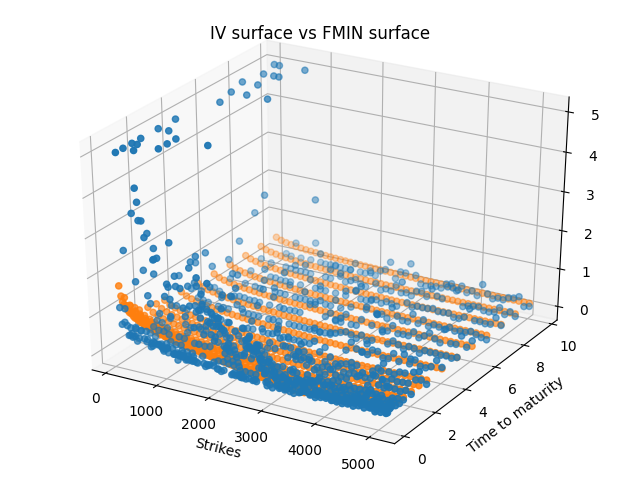

In [ ]:
#IV_market = pd.DataFrame.transpose(IV)

x = K
y = T
X,Y = np.meshgrid(x,y)
Z = IV_FMIN
fig = plt.figure()
fig.set_size_inches(8, 6)

ax = fig.add_subplot(111,projection='3d')
ax.scatter(X,Y,Z)
ax.scatter(X,Y,IV_market)

ax.set_title('IV surface vs FMIN surface')
ax.set_ylabel('Time to maturity')
ax.set_xlabel('Strikes')

Text(0.5, 0, 'Strikes')

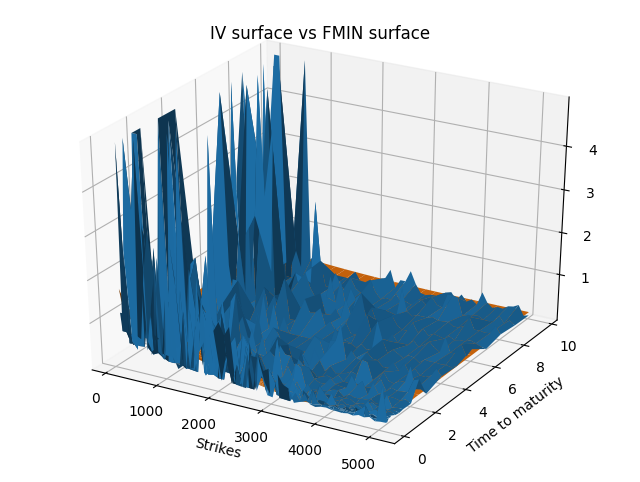

In [ ]:
x = K
y = T
X,Y = np.meshgrid(x,y)
Z = IV_FMIN
fig = plt.figure()
fig.set_size_inches(8, 6)

ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)
ax.plot_surface(X,Y,IV_market)

ax.set_title('IV surface vs FMIN surface')
ax.set_ylabel('Time to maturity')
ax.set_xlabel('Strikes')

Text(0.5, 0, 'Strikes')

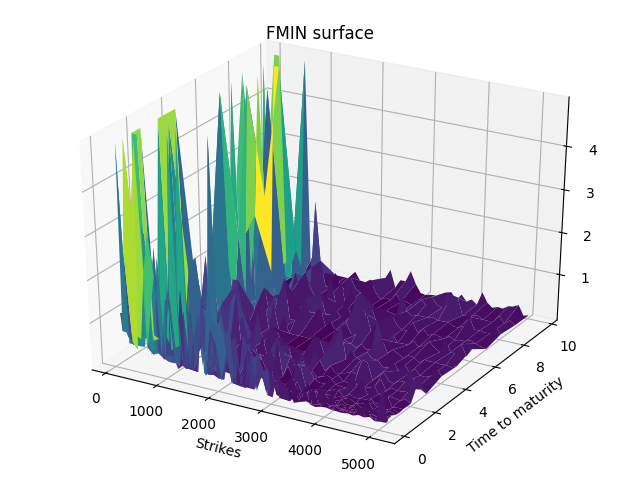

In [ ]:
x = K
y = T
X,Y = np.meshgrid(x,y)
Z = IV_FMIN
fig = plt.figure()
fig.set_size_inches(8, 6)

ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z, cmap='viridis')

ax.set_title('FMIN surface')
ax.set_ylabel('Time to maturity')
ax.set_xlabel('Strikes')